In [1]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import time

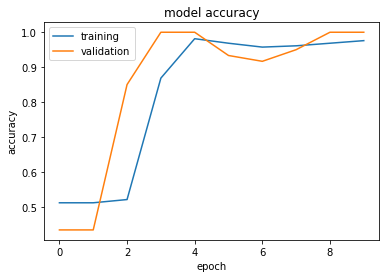

Accuracy: 98.00


In [18]:
# generate a simple model for test. 
# the model is a 3 layers neural network, the 1st layer is 12 neurons, relu is the activation function
# the second layer is 8 neurons, relu is the activation functioin
# the third layer is 1 neurons, sigmoid is the activation function 
# prepare the data set X is a numpy array strore the x1 and x2, Y store the classes for X. x2>=x1 is class 1, x2<x1 is class 2
np.random.seed(0)
X = np.random.uniform(0. , 100., [700,2])
Y = np.zeros((700, 1))

for row in range(700):
    if X[row][0] <= X[row][1]:
        Y[row] = 1
    else:
        Y[row] = 0
# divide into train and test data set
X_train = X[:600]
X_test = X[600:]
Y_train = Y[:600]
Y_test = Y[600:]

model = Sequential()

model.add(Dense(units=12, activation="relu", input_dim=2))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# plot the losses
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(X_train, Y_train, batch_size=100,epochs=10, verbose=0, validation_split=.1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))

In [19]:
# save model
model.save("x1_smaller_than_x2.h5")

In [ ]:
# check the output is the probability that x1 is less than x2
np.random.seed(2)
xx = np.random.uniform(0., 100., [10,2])
yy = model_2.predict(xx)
print(xx)
print(yy)

In [ ]:
# try to find out that when x1 is really close to x2 then the output is really near to 0.5
np.random.seed(2)
xx2 = np.ones((7,2))
xx2[0] = [6.,6.23]
xx2[1] = [2.,2.2]
xx2[2] = [20.,20.]
xx2[4] = [45.,45.1]
xx2[5] = [36.,36.44]
xx2[6] = [90., 8.]
print(xx2)

yy2 = model_2.predict(xx2)
print(yy2)